In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [2]:
# Acquire data
df = pd.read_csv('data/train.csv')
testdf = pd.read_csv('data/test.csv')
preddf = pd.read_csv('data/gender_submission.csv')

In [3]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [4]:
df.columns[df.isna().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [5]:
testdf.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df['Embarked']=df['Embarked'].fillna('Q')

In [9]:
df['Age']=df['Age'].fillna(df.Age.mean())

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

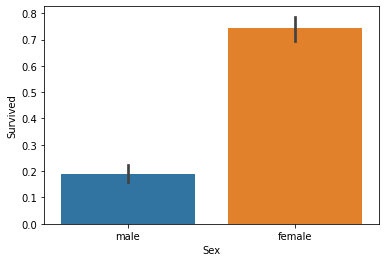

In [10]:
sns.barplot(x='Sex',y='Survived',data=df)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

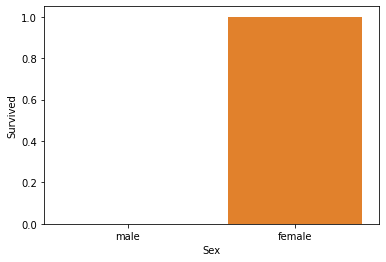

In [11]:
x=testdf['Sex']
y=preddf['Survived']
sns.barplot(x=x,y=y)

<AxesSubplot:xlabel='Age', ylabel='Survived'>

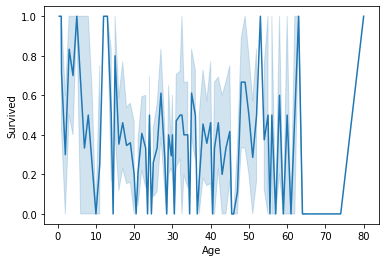

In [12]:
# Test data is completely biased towards female survival
sns.lineplot(x='Age',y='Survived',data=df)

<AxesSubplot:xlabel='Age', ylabel='Survived'>

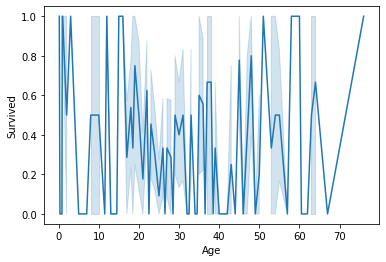

In [13]:
x=testdf['Age']
y=preddf['Survived']
sns.lineplot(x=x,y=y)

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

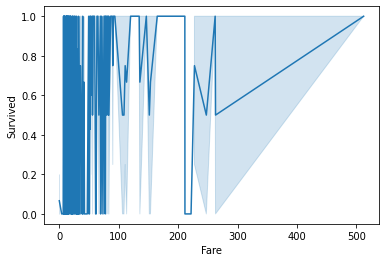

In [14]:
# middle aged people survived less
sns.lineplot(x='Fare',y='Survived',data=df)

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

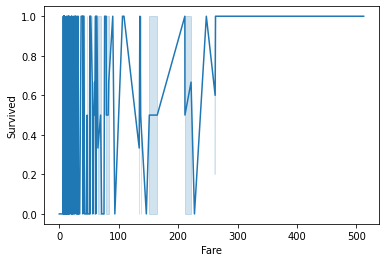

In [15]:
x=testdf['Fare']
y=preddf['Survived']
sns.lineplot(x=x,y=y)

In [16]:
# High payers mostly survives
l=LabelEncoder()
df['Sex']=l.fit_transform(df['Sex'])
testdf['Sex']=l.fit_transform(testdf['Sex'])

In [17]:
# Train set and Test set

In [18]:
xtrain = df.drop(['Cabin','Survived','Name','Ticket','PassengerId'],axis=1)
ytrain = df['Survived']

In [19]:
xtest = testdf.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
ytest = preddf['Survived']

In [20]:
xtrain

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,S
1,1,0,38.000000,1,0,71.2833,C
2,3,0,26.000000,0,0,7.9250,S
3,1,0,35.000000,1,0,53.1000,S
4,3,1,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,S
887,1,0,19.000000,0,0,30.0000,S
888,3,0,29.699118,1,2,23.4500,S
889,1,1,26.000000,0,0,30.0000,C


In [21]:
l1=LabelEncoder()
xtrain['Embarked']=l1.fit_transform(xtrain['Embarked'])
xtest['Embarked']=l1.fit_transform(xtest['Embarked'])

In [22]:
xtest['Age']=xtest['Age'].fillna(xtest.Age.mean())

In [23]:
xtest.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [24]:
xtest['Fare']=xtest['Fare'].fillna(xtest.Fare.mean())

In [ ]:
# Training

In [25]:
# Random Forest
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(xtrain,ytrain)
rfc.score(xtest,ytest)

0.80622009569378

In [26]:
rfm2= cross_val_score(estimator=rfc,X=xtrain,y=ytrain,cv=10)
rfm2.mean()

0.8137952559300874

In [27]:
pred1 = rfc.predict(xtest)

In [28]:
#SVM + GridSearchCV
sv = SVC()
sv.fit(xtrain,ytrain)
sv.score(xtest,ytest)

0.6555023923444976

In [ ]:
gsv = GridSearchCV(sv,{
    'C':[0.1,0.4,0.8,1.0,1.2,1.5,2.0,3.0,5.0,8.0,9.0],
    'gamma':[0.1,0.4,0.8,1.0,1.2,1.5],
    'kernel':['rbf','linear']
},scoring='accuracy', cv=10)

In [29]:
"""gsv.fit(xtrain,ytrain)"""

'gsv.fit(xtrain,ytrain)'

In [30]:
"""gsv.best_params_"""

'gsv.best_params_'

In [31]:
"""sv2 = SVC(C=,gamma=,kernel='')"""

"sv2 = SVC(C=,gamma=,kernel='')"

In [32]:
"""sv2.fit(xtrain,ytrain)"""

'sv2.fit(xtrain,ytrain)'

In [33]:
"""sv2.score(xtest,ytest)"""

'sv2.score(xtest,ytest)'

In [35]:
lr = LogisticRegression()
xtrain=pd.concat([xtrain,xtest])
ytrain=pd.concat([ytrain,ytest])
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)

c:\Users\cucko\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.992822966507177

In [36]:
"""lr2=cross_val_score(lr,xtrain,ytrain,cv=1, scoring='roc_auc')
lr2.mean()"""

"lr2=cross_val_score(lr,xtrain,ytrain,cv=1, scoring='roc_auc')\nlr2.mean()"

In [39]:
predictions = lr.predict(xtest)

In [40]:
submission=testdf[['PassengerId']]
submission

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [41]:
submission['Survived']=predictions
submission

C:\Users\cucko\AppData\Local\Temp\ipykernel_30084\543222413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Survived']=predictions


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [46]:
submissionr=testdf[['PassengerId']]
submissionr

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [47]:
submissionr['Survived']=pred1
submissionr

C:\Users\cucko\AppData\Local\Temp\ipykernel_30084\4108154646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submissionr['Survived']=pred1


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [48]:
submissionr.to_csv("submission2.csv",index=None)